# DB Puenktlichkeit
Wir starten mit ein paar imports

In [31]:
import datetime
import os
import sys
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np


module_path = os.path.abspath(os.path.join('./lib/'))
if module_path not in sys.path:
    sys.path.append(module_path)
from lib.dbahn_utils import BahnUtils


Hier den Pfad anpassen in den die paket_1_1_* zips extrahiert wurden

In [32]:
bahn_utils = BahnUtils(Path(os.path.expanduser(f'~/Downloads/')))


Wir lesen die Daten nun ein

In [13]:
# Read the data for november
folders = ['202010', '202011', '202012']
ret_folders = {}
for folder in folders:
    OUT = bahn_utils.read_data_folder(folder)
    ret_folders[folder] = OUT

NameError: name 'bahn_utils' is not defined

### Plot the distribution of notifications across app installations (only top 1000)

In [1]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i, (folder_name, folder_data) in enumerate(ret_folders.items()):

    push_notifications = np.asarray([v['notifications'] for k, v in folder_data[1].items()])

    print(folder_name)
    print('\t', folder_name, 'max', np.max(push_notifications))
    print('\t', folder_name, 'mean', np.nanmean(push_notifications), 'std', np.nanstd(push_notifications))
    print('\t', folder_name, 'median', np.median(push_notifications))


    axs[i].hist(push_notifications[push_notifications < 1000], np.arange(0, 1000, 50))
    axs[i].set_title(folder_name)
    # plt.scatter(x=int(np.nanmean(push_notifications[push_notifications < 1000])), y=0)

    axs[i].set_xlabel('Notifications')
    axs[i].set_ylabel('Installations')

plt.show()

NameError: name 'plt' is not defined

### Plot the distribution of different push notification types

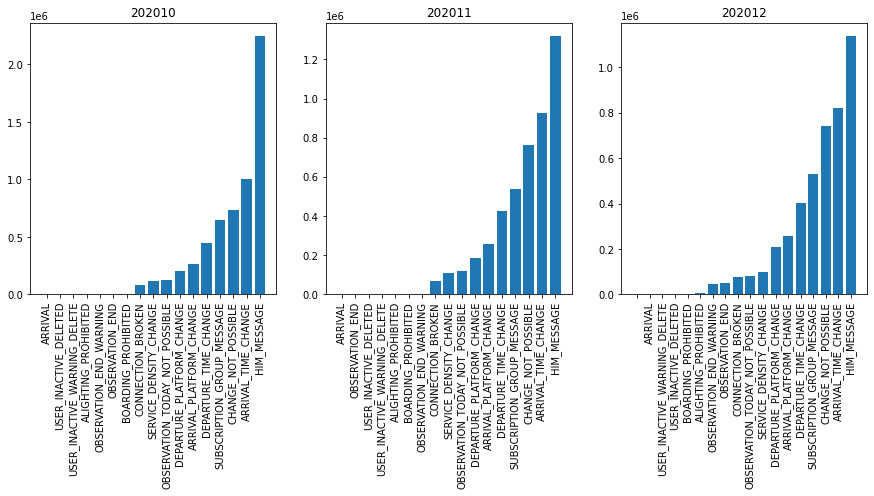

In [136]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i, (folder_name, folder_data) in enumerate(ret_folders.items()):
    key_vals = [(k, v) for k, v in folder_data[2].items()]
    key_vals = sorted(key_vals, key=lambda x: x[1])


    axs[i].bar(np.arange(0, len(key_vals)), [x[1] for x in key_vals])
    axs[i].set_xticks(np.arange(0, len(key_vals)))
    axs[i].set_xticklabels([x[0] for x in key_vals], rotation=90, rotation_mode="default")
    axs[i].set_title(folder_name)
plt.show()


### Plot the number of days the users get notifications

202010 max 31
202010 mean 12.39939688390015
202010 median 11.0
202011 max 30
202011 mean 11.859104365876068
202011 median 11.0
202012 max 31
202012 mean 10.484940465945895
202012 median 9.0


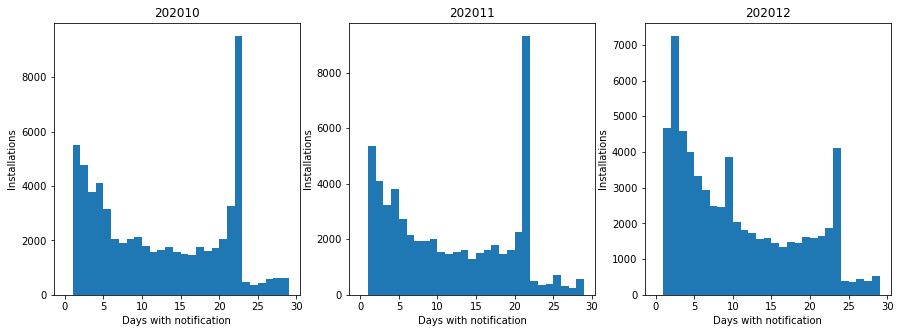

In [137]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
for i, (folder_name, folder_data) in enumerate(ret_folders.items()):
    push_notifications_per_day = np.asarray([len(v.keys()) - 2 for k, v in folder_data[1].items()])
    print(folder_name)
    print('\t', folder_name, 'max', np.max(push_notifications_per_day))
    print('\t', folder_name, 'mean', np.nanmean(push_notifications_per_day))
    print('\t', folder_name, 'median', np.median(push_notifications_per_day))

    axs[i].hist(push_notifications_per_day, np.arange(0, 30, 1))
    axs[i].set_xlabel('Days with notification')
    axs[i].set_ylabel('Installations')
    axs[i].set_title(folder_name)
plt.show()


### Other interesting ideas
  * Notifications by weekday
  * Notifications by time of the day
    * you have to extend the read_data_folder for that



In [ ]:
# Filterung Pünktlichkeit als erstes nach: chanel_address: CANCELLATION, ARRIVAL_TIME_CHANGE (evtl auch DEPARTURE_TIME_CHANGE)
#
# Dann FIlterung welche Züge/Verbindungen überhaupt abonniert:
# mit TtConnectionEvent ArrivalStop->StopName & PlannedArrivalTime, Arrival Delay (für Pünktlichkeit) und DepartureStop->Stop Name und Planned Departure (evtl noch Departure Delay);

